# Homework 1
- 姓名： 赵懿
- 学号： 21921266

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data
Here, I use `potdigits.tra` (processed 8*8 image) as my data set. First, let's load digit 3 and visualize some images.

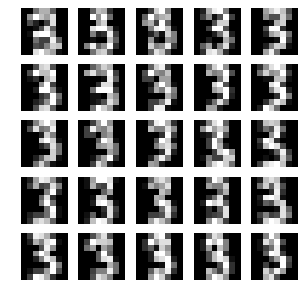

In [77]:
allData = np.loadtxt('./potdigits.tra', dtype=int, delimiter=',')
data = allData[allData[:, -1]==3, :-1]
# now visualize some '3'
row, col = 5,5
fig = plt.figure(figsize=(row, col))
for r in range(row):
    for c in range(col):
        fig.add_subplot(row, col, r*row+c+1)
        plt.imshow(data[r*row+c].reshape((8, 8)), cmap=plt.cm.gray)
        plt.axis('off')
plt.show()

## PCA
Then, let's implement Principal Component Analysis and apply it on our data set of digit '3'.

In [78]:
k = 2
_mean = np.mean(data, axis=0)
_centered = data-_mean
_cov = np.cov(_centered, rowvar=False)
evals, evecs = np.linalg.eig(_cov)
# I do sort the eigen values and vector becuase they have alreay been sorted in reverse order when numpy returns them. But still, it's always better to explictly sort them.

## Plot
Now, let's plot all the 2-dim projected images.

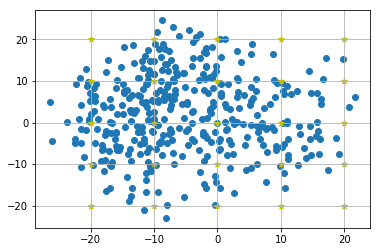

In [86]:
pdata = data@evecs[:, :k]
fig = plt.figure()
ax = fig.gca()
plt.scatter(pdata[:, 0], pdata[:, 1])
plt.grid()
# some typical point (actually not in the data set)
pimgs = []
for p1 in range(-20, 21, 10):
    for p2 in range(-20, 21, 10):
        pimgs.append([p1, p2])
pimgs = np.array(pimgs)
plt.scatter(pimgs[:, 0], pimgs[:, 1], c='y', marker='*')
# show
plt.show()

Then let's visualize some images. According to scatter figure above, I choise 25 grid points at \[-20, 20\]*\[-20, 20\] with a distance of 5 between each of them. Note, I directly visulize the **reconstructed images** from grid point rather than using the images nearest the grid points. 

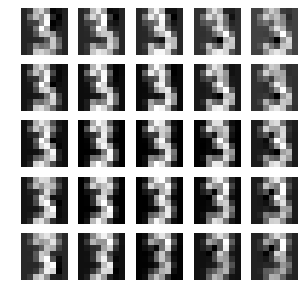

In [80]:
# reconstrcut
rimgs = pimgs@evecs[:, :k].T + _mean
# visualize
row, col = 5,5
fig = plt.figure(figsize=(row, col))
for r in range(row):
    for c in range(col):
        fig.add_subplot(row, col, r*row+c+1)
        plt.imshow(rimgs[r*row+c].reshape((8, 8)), cmap=plt.cm.gray)
        plt.axis('off')
plt.show()